## Time to get your hands dirty. Galaxies vs quasars with neural networks.

Let's go back to our galaxy vs quasar data we've used in a previous exercise. 

1. Read in SDSS galaxy color data from `solutions/galaxyquasar.csv`. Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 

2. Now we're going to fit a neural network classifier. First, scale your data appropriately and do a 30% train/test split.

3. Now train the classifier. Use one the package among those we've seen. These include Tensorflow via keras, pytorch, and the MPL classifier implemented in scikit-learn. This is an opportunity to pick the one you're most interested in learning. 

3. Start from a network architecture with a single hidden layer with 5 neurons, using the `adam` solver, the `relu` activation function, and a learninig rate of `0.001`. Plot the resulting ROC curve. 

4. Now let's optimize the hyperparameters of your network. Explore different hyperparameters and see what fits the data best.  Do your best now to optimize the network architecture. Be creative!

5. Is your best result comparable with the simpler classifiers we've seen before? Do we need deep learning here? If yes, which features are captured best?


A few tips:

- In scikit-learn, remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.
- If it takes too long, run the hyperparameter optimization on a subset of the training set. Then retrain the full network using the best hyperparameters only.
- On cross validation, for scikit learn we've seen how to use `GridSearchCV` already. For Tensorflow, there's a really cool tool called [Tensorboard](https://www.tensorflow.org/tensorboard)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("../solutions/galaxyquasar.csv")
df

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [3]:
df['u-g'] = df['u']- df['g'] 
df['g-r'] = df['g']- df['r'] 
df['r-i'] = df['r']- df['i']
df['i-z'] = df['i']- df['z']
df['u-g']

0        0.43537
1        1.76946
2        1.73268
3        1.13314
4        0.17640
          ...   
49995    1.24913
49996    1.63759
49997    1.31842
49998    1.27429
49999    1.05021
Name: u-g, Length: 50000, dtype: float64

In [4]:
le = LabelEncoder()
# Assign unique integers: 1 QSO, 0 galaxy
df['class'] = le.fit_transform(df['class'] )
labels_class = le.inverse_transform(df['class'] )
class_names = le.classes_
print('Class names: ', class_names)
print('Labels: ', labels_class)

Class names:  ['GALAXY' 'QSO']
Labels:  ['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


In [5]:
df

,u,g,r,i,z,class,z1,zerr,u-g,g-r,r-i,i-z
0,18.97213,18.53676,18.58280,18.34936,18.29215,1,0.522819,0.000155,0.43537,-0.04604,0.23344,0.05721
1,19.24592,17.47646,16.47817,16.04472,15.68851,0,0.122846,0.000028,1.76946,0.99829,0.43345,0.35621
2,19.43536,17.70268,16.91565,16.58327,16.39128,0,0.000000,0.000000,1.73268,0.78703,0.33238,0.19199
3,19.31626,18.18312,17.39591,16.94549,16.65395,0,0.147435,0.000009,1.13314,0.78721,0.45042,0.29154
4,19.28828,19.11188,18.88937,18.80013,18.49183,1,2.011455,0.000631,0.17640,0.22251,0.08924,0.30830
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,0,0.113016,0.000011,1.24913,0.72496,0.41383,0.27918
49996,18.52021,16.88262,16.03280,15.56884,15.22454,0,0.085063,0.000014,1.63759,0.84982,0.46396,0.34430
49997,18.62718,17.30876,16.87371,16.62399,16.42296,0,0.054429,0.000008,1.31842,0.43505,0.24972,0.20103
49998,19.55140,18.27711,17.62101,17.21947,17.03347,0,0.112571,0.000009,1.27429,0.65610,0.40154,0.18600


In [6]:
scaler = StandardScaler().set_output(transform="pandas")
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'u-g':'i-z'], df['class'], test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
my_init = keras.initializers.glorot_uniform(seed=1)
model = tf.keras.Sequential([tf.keras.layers.InputLayer(shape = (4,)), 
            # Inner layers, can add/change
            keras.layers.Dense(5,  activation='relu',kernel_initializer=my_init),
            #keras.layers.Dense(16,  activation='tanh',kernel_initializer=my_init),
            #keras.layers.Dense(8,  activation='tanh',kernel_initializer=my_init),
            # Output layer, do not change
            keras.layers.Dense(1, activation='sigmoid',kernel_initializer=my_init)])

In [8]:
model.compile(loss="MSE", optimizer=keras.optimizers.Adam(learning_rate=1e-2), metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9461 - loss: 0.0542 - val_accuracy: 0.9848 - val_loss: 0.0135
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0138 - val_accuracy: 0.9844 - val_loss: 0.0134
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9826 - loss: 0.0148 - val_accuracy: 0.9846 - val_loss: 0.0134
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9851 - loss: 0.0130 - val_accuracy: 0.9853 - val_loss: 0.0129
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9837 - loss: 0.0143 - val_accuracy: 0.9842 - val_loss: 0.0136
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9838 - loss: 0.0140 - val_accuracy: 0.9849 - val_loss: 0.0132
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9844 - loss: 0.0133 - val_accuracy: 0.9850 - val_loss: 0.0130
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0136 - 

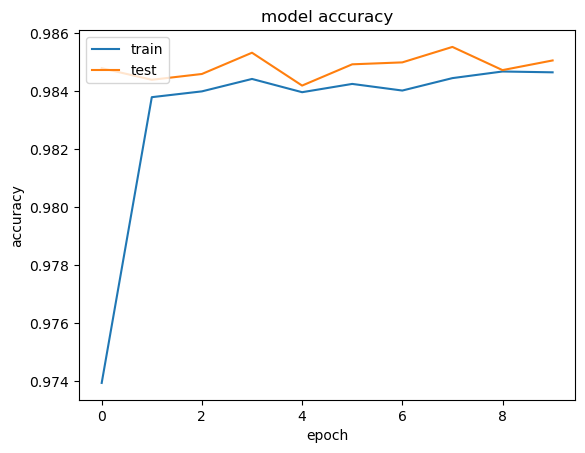

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

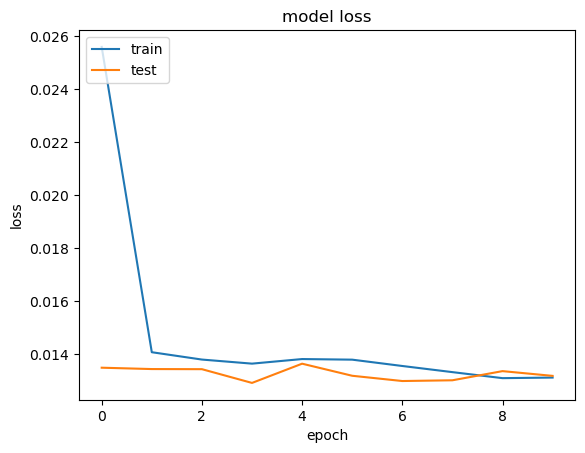

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


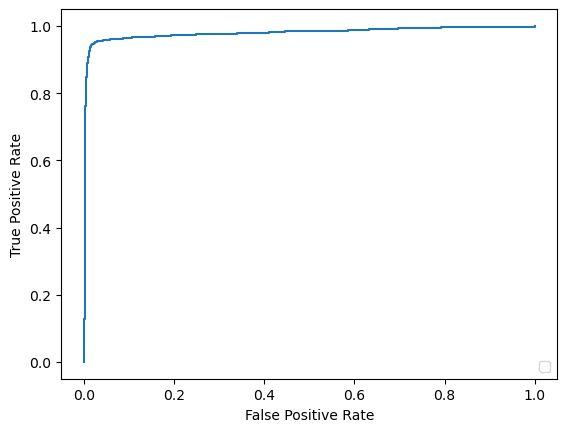

In [11]:
fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [12]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [13]:
import datetime

In [14]:
log_dir = 'prova'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9845 - loss: 0.0138 - val_accuracy: 0.9851 - val_loss: 0.0129
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9840 - loss: 0.0136 - val_accuracy: 0.9838 - val_loss: 0.0138
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9853 - loss: 0.0133 - val_accuracy: 0.9852 - val_loss: 0.0131
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9848 - loss: 0.0132 - val_accuracy: 0.9847 - val_loss: 0.0131
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9851 - loss: 0.0130 - val_accuracy: 0.9835 - val_loss: 0.0141
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9834 - loss: 0.0145 - val_accuracy: 0.9849 - val_loss: 0.0129
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9849 - loss: 0.0129 - val_accuracy: 0.9845 - val_loss: 0.0132
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9845 - loss: 0.0131 - 

In [18]:
%tensorboard --logdir prova

Reusing TensorBoard on port 6006 (pid 19152), started 0:06:55 ago. (Use '!kill 19152' to kill it.)